Training a perceptron neural net from scratch using the sepal length & width, petal length & width as data inputs.

In [19]:
%matplotlib inline

In [20]:
from matplotlib import pyplot as plt
import numpy as np

In [21]:
# each point is SepalLength on Dm, SepalWidth on Dm, PetalLength on Dm, PetalWidth on Dm & species (0.1)
# 0 for Iris-setosa and 1 for Iris-versicolor
data = [[ 5.4,  3.4,  1.7,  0.2,  0. ],
       [ 5.1,  3.7,  1.5,  0.4,  0. ],
       [ 4.6,  3.6,  1. ,  0.2,  0. ],
       [ 5.1,  3.3,  1.7,  0.5,  0. ],
       [ 4.8,  3.4,  1.9,  0.2,  0. ],
       [ 5. ,  3. ,  1.6,  0.2,  0. ],
       [ 5. ,  3.4,  1.6,  0.4,  0. ],
       [ 5.2,  3.5,  1.5,  0.2,  0. ],
       [ 5.2,  3.4,  1.4,  0.2,  0. ],
       [ 4.7,  3.2,  1.6,  0.2,  0. ],
       [ 4.8,  3.1,  1.6,  0.2,  0. ],
       [ 5.4,  3.4,  1.5,  0.4,  0. ],
       [ 5.2,  4.1,  1.5,  0.1,  0. ],
       [ 5.5,  4.2,  1.4,  0.2,  0. ],
       [ 4.9,  3.1,  1.5,  0.1,  0. ],
       [ 5. ,  3.2,  1.2,  0.2,  0. ],
       [ 5.5,  3.5,  1.3,  0.2,  0. ],
       [ 4.9,  3.1,  1.5,  0.1,  0. ],
       [ 4.4,  3. ,  1.3,  0.2,  0. ],
       [ 5.1,  3.4,  1.5,  0.2,  0. ],
       [ 5. ,  3.5,  1.3,  0.3,  0. ],
       [ 4.5,  2.3,  1.3,  0.3,  0. ],
       [ 4.4,  3.2,  1.3,  0.2,  0. ],
       [ 5. ,  3.5,  1.6,  0.6,  0. ],
       [ 5.1,  3.8,  1.9,  0.4,  0. ],
       [ 4.8,  3. ,  1.4,  0.3,  0. ],
       [ 5.1,  3.8,  1.6,  0.2,  0. ],
       [ 4.6,  3.2,  1.4,  0.2,  0. ],
       [ 5.3,  3.7,  1.5,  0.2,  0. ],
       [ 5. ,  3.3,  1.4,  0.2,  0. ],
       [ 6.8,  2.8,  4.8,  1.4,  1. ],
       [ 6.7,  3. ,  5. ,  1.7,  1. ],
       [ 6. ,  2.9,  4.5,  1.5,  1. ],
       [ 5.7,  2.6,  3.5,  1. ,  1. ],
       [ 5.5,  2.4,  3.8,  1.1,  1. ],
       [ 5.5,  2.4,  3.7,  1. ,  1. ],
       [ 5.8,  2.7,  3.9,  1.2,  1. ],
       [ 6. ,  2.7,  5.1,  1.6,  1. ],
       [ 5.4,  3. ,  4.5,  1.5,  1. ],
       [ 6. ,  3.4,  4.5,  1.6,  1. ],
       [ 6.7,  3.1,  4.7,  1.5,  1. ],
       [ 6.3,  2.3,  4.4,  1.3,  1. ],
       [ 5.6,  3. ,  4.1,  1.3,  1. ],
       [ 5.5,  2.5,  4. ,  1.3,  1. ],
       [ 5.5,  2.6,  4.4,  1.2,  1. ],
       [ 6.1,  3. ,  4.6,  1.4,  1. ],
       [ 5.8,  2.6,  4. ,  1.2,  1. ],
       [ 5. ,  2.3,  3.3,  1. ,  1. ],
       [ 5.6,  2.7,  4.2,  1.3,  1. ],
       [ 5.7,  3. ,  4.2,  1.2,  1. ],
       [ 5.7,  2.9,  4.2,  1.3,  1. ],
       [ 6.2,  2.9,  4.3,  1.3,  1. ],
       [ 5.1,  2.5,  3. ,  1.1,  1. ],
       [ 5.7,  2.8,  4.1,  1.3,  1. ]]

In [22]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

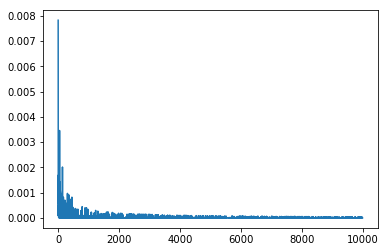

In [23]:
# training loop
learning_rate = 0.2
costs = []

# weights & bias value
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
w4 = np.random.randn()
b = np.random.randn()

for i in range(1000000) :
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b
    prediction = sigmoid(z)
    
    target = point[4]
    
    # cost function
    cost = np.square(prediction - target)
    
    # derivative of the cost function
    dcost_prediction = 2 * (prediction - target)
    
    # sigmoid_p which is defined above is the derivative of sigmoid
    dprediction_dz = sigmoid_p(z)
    
    # For the derivatives of the weights 
    # it’s the inputs values because they are constants 
    # & for the derivative of the Bias it’s 1
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_dw3 = point[2]
    dz_dw4 = point[3]
    dz_db = 1
    
    # the slope of the cost function
    dcost_dz = dcost_prediction * dprediction_dz
    
    # the slope of weights & bias value
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_dw3 = dcost_dz * dz_dw3
    dcost_dw4 = dcost_dz * dz_dw4
    dcost_db = dcost_dz * dz_db
    
    # getting the new weights & bias values
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    w3 = w3 - learning_rate * dcost_dw3
    w4 = w4 - learning_rate * dcost_dw4
    b = b - learning_rate * dcost_db
    
    # this is just for the graph
    if i % 100 == 0 :
        cost_sum = 0
        for j in range(len(data)) :
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b
            prediction = sigmoid(z)
            
            target = point[4]
            cost_sum += np.square(prediction - target)
            
        costs.append(cost_sum/len(data))

plt.plot(costs)

In [24]:
test_data = [[ 5.1,  3.5,  1.4,  0.2,  0. ],
       [ 4.9,  3. ,  1.4,  0.2,  0. ],
       [ 4.7,  3.2,  1.3,  0.2,  0. ],
       [ 4.6,  3.1,  1.5,  0.2,  0. ],
       [ 5. ,  3.6,  1.4,  0.2,  0. ],
       [ 5.2,  2.7,  3.9,  1.4,  1. ],
       [ 5. ,  2. ,  3.5,  1. ,  1. ],
       [ 5.9,  3. ,  4.2,  1.5,  1. ],
       [ 6. ,  2.2,  4. ,  1. ,  1. ],
       [ 6.1,  2.9,  4.7,  1.4,  1. ],
       [ 5.6,  2.9,  3.6,  1.3,  1. ],
       [ 6.7,  3.1,  4.4,  1.4,  1. ],
       [ 5.6,  3. ,  4.5,  1.5,  1. ],
       [ 5.8,  2.7,  4.1,  1. ,  1. ],
       [ 6.2,  2.2,  4.5,  1.5,  1. ],
       [ 5.6,  2.5,  3.9,  1.1,  1. ],
       [ 5.4,  3.9,  1.3,  0.4,  0. ],
       [ 5.1,  3.5,  1.4,  0.3,  0. ],
       [ 5.7,  3.8,  1.7,  0.3,  0. ],
       [ 5.1,  3.8,  1.5,  0.3,  0. ],
       [ 7. ,  3.2,  4.7,  1.4,  1. ],
       [ 6.4,  3.2,  4.5,  1.5,  1. ],
       [ 6.9,  3.1,  4.9,  1.5,  1. ],
       [ 5.5,  2.3,  4. ,  1.3,  1. ],
       [ 5.7,  2.8,  4.5,  1.3,  1. ],
       [ 5.4,  3.9,  1.7,  0.4,  0. ],
       [ 4.6,  3.4,  1.4,  0.3,  0. ],
       [ 4.4,  2.9,  1.4,  0.2,  0. ],
       [ 4.9,  3.1,  1.5,  0.1,  0. ],
       [ 5.4,  3.7,  1.5,  0.2,  0. ],
       [ 4.8,  3.4,  1.6,  0.2,  0. ],
       [ 4.8,  3. ,  1.4,  0.1,  0. ],
       [ 4.3,  3. ,  1.1,  0.1,  0. ],
       [ 5.8,  4. ,  1.2,  0.2,  0. ],
       [ 5.7,  4.4,  1.5,  0.4,  0. ],
       [ 6.3,  3.3,  4.7,  1.6,  1. ],
       [ 4.9,  2.4,  3.3,  1. ,  1. ],
       [ 6.6,  2.9,  4.6,  1.3,  1. ],
       [ 5.9,  3.2,  4.8,  1.8,  1. ],
       [ 6.1,  2.8,  4. ,  1.3,  1. ],
       [ 6.3,  2.5,  4.9,  1.5,  1. ],
       [ 6.1,  2.8,  4.7,  1.2,  1. ],
       [ 6.4,  2.9,  4.3,  1.3,  1. ]]

for i in range(len(test_data)) :
    point = test_data[i]
    print(point)
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b
    prediction = sigmoid(z)
    print("prediction : {}" .format(prediction))

[5.1, 3.5, 1.4, 0.2, 0.0]
prediction : 9.86689431961e-05
[4.9, 3.0, 1.4, 0.2, 0.0]
prediction : 0.000536712976616
[4.7, 3.2, 1.3, 0.2, 0.0]
prediction : 0.00024980160693
[4.6, 3.1, 1.5, 0.2, 0.0]
prediction : 0.00110007302225
[5.0, 3.6, 1.4, 0.2, 0.0]
prediction : 8.75231448762e-05
[5.2, 2.7, 3.9, 1.4, 1.0]
prediction : 0.999957426494
[5.0, 2.0, 3.5, 1.0, 1.0]
prediction : 0.999855577145
[5.9, 3.0, 4.2, 1.5, 1.0]
prediction : 0.999957177839
[6.0, 2.2, 4.0, 1.0, 1.0]
prediction : 0.999913285433
[6.1, 2.9, 4.7, 1.4, 1.0]
prediction : 0.999995479079
[5.6, 2.9, 3.6, 1.3, 1.0]
prediction : 0.999059731535
[6.7, 3.1, 4.4, 1.4, 1.0]
prediction : 0.999902924079
[5.6, 3.0, 4.5, 1.5, 1.0]
prediction : 0.99999446032
[5.8, 2.7, 4.1, 1.0, 1.0]
prediction : 0.999850723945
[6.2, 2.2, 4.5, 1.5, 1.0]
prediction : 0.999998447087
[5.6, 2.5, 3.9, 1.1, 1.0]
prediction : 0.999872335378
[5.4, 3.9, 1.3, 0.4, 0.0]
prediction : 2.39448431903e-05
[5.1, 3.5, 1.4, 0.3, 0.0]
prediction : 0.000138861121291
[5.7, 3.8,

In [25]:
# checkout the github to see this example using pandas
# https://github.com/smakosh/Perceptron-neural-net-from-scratch/blob/master/Linear_regression_perceptron.ipynb

mystery_flower = [5.6, 2.7, 4.2, 1.3]
# for now let's just guess that mystery flower
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + mystery_flower[2] * w3 + mystery_flower[3] * w4 + b
prediction = sigmoid(z)
prediction

0.99997683644081004

In [26]:
# 0 for Iris-setosa and 1 for Iris-versicolor
def guess_flower(SepalLength, SepalWidth, PetalLength, PetalWidth) :
    z = SepalLength * w1 + SepalWidth * w2 + PetalLength * w3 + PetalWidth * w4 + b
    prediction = sigmoid(z)
    if prediction < .5:
        print('Iris-setosa')
    else:
        print('Iris-versicolor')

In [27]:
guess_flower(6.6,  3 ,  4.4,  1.4)

Iris-versicolor


In [28]:
guess_flower( 5.,  3.4,  1.5,  0.2)

Iris-setosa


In [29]:
guess_flower(6.5,  2.8,  4.6,  1.5)

Iris-versicolor
